## SBM Visualizations

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# SBM RRWP
data = np.load('/mnt/lts4/scratch/home/carballo/DAGDiGress/outputs/2025-05-13/11-53-35-sbm-rrwp-sample/generated_adjs.npz')

In [3]:
print(data.files)

['arr_0', 'arr_1', 'arr_2', 'arr_3', 'arr_4', 'arr_5', 'arr_6', 'arr_7', 'arr_8', 'arr_9', 'arr_10', 'arr_11', 'arr_12', 'arr_13', 'arr_14', 'arr_15', 'arr_16', 'arr_17', 'arr_18', 'arr_19', 'arr_20', 'arr_21', 'arr_22', 'arr_23', 'arr_24', 'arr_25', 'arr_26', 'arr_27', 'arr_28', 'arr_29', 'arr_30', 'arr_31', 'arr_32', 'arr_33', 'arr_34', 'arr_35', 'arr_36', 'arr_37', 'arr_38', 'arr_39']


In [4]:
array = data['arr_5']
print(array.shape)
print(array)

(47, 47)
[[False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [ True False False ... False False False]]


In [6]:
# Convert adjacency matrix to directed graph
G = nx.from_numpy_array(array.astype(int), create_using=nx.DiGraph)

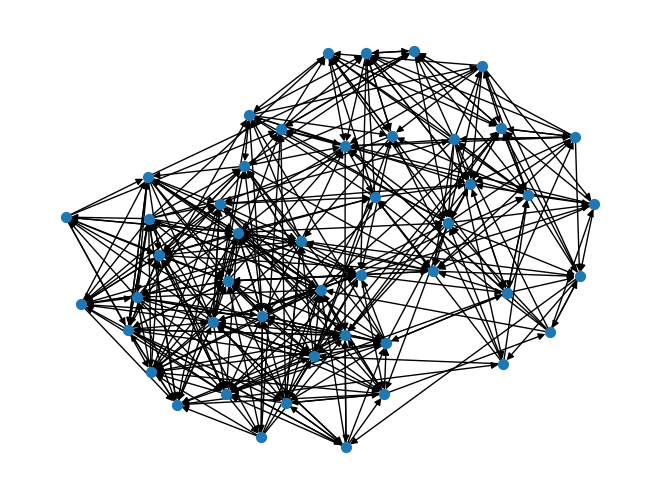

In [ ]:
# Draw the graph
pos = nx.kamada_kawai_layout(G)  # Or try nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, arrows=True, node_size=50)
plt.show()

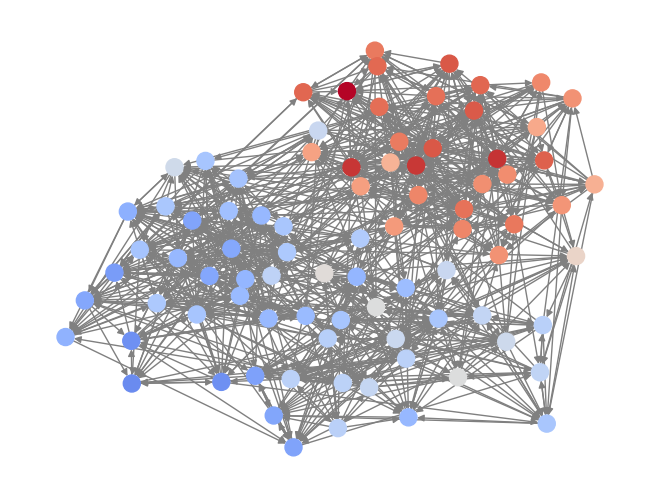

In [20]:
array = data['arr_17']
G = nx.from_numpy_array(array.astype(int), create_using=nx.DiGraph)
pos = nx.spring_layout(G)  # Or try nx.spring_layout(G)
# Set node colors based on the eigenvectors
# Compute directed Laplacian matrix (as a NumPy array)
L = np.asarray(nx.directed_laplacian_matrix(G, walk_type="pagerank"))

# Get eigenvalues and eigenvectors
w, U  = np.linalg.eigh(L)
# w, U = np.linalg.eigh(nx.normalized_laplacian_matrix(G).toarray())
vmin, vmax = np.min(U[:, 1]), np.max(U[:, 1])
m = max(np.abs(vmin), vmax)
vmin, vmax = -m, m

plt.figure()
nx.draw(
    G,
    pos,
    font_size=5,
    node_size=150,
    with_labels=False,
    node_color=U[:, 1],
    cmap=plt.cm.coolwarm,
    vmin=vmin,
    vmax=vmax,
    arrows=True,
    edge_color="grey",
)
plt.show()

<class 'networkx.utils.decorators.argmap'> compilation 17:5: FutureWarning: directed_laplacian_matrix will return a numpy array instead of a matrix in NetworkX 3.0


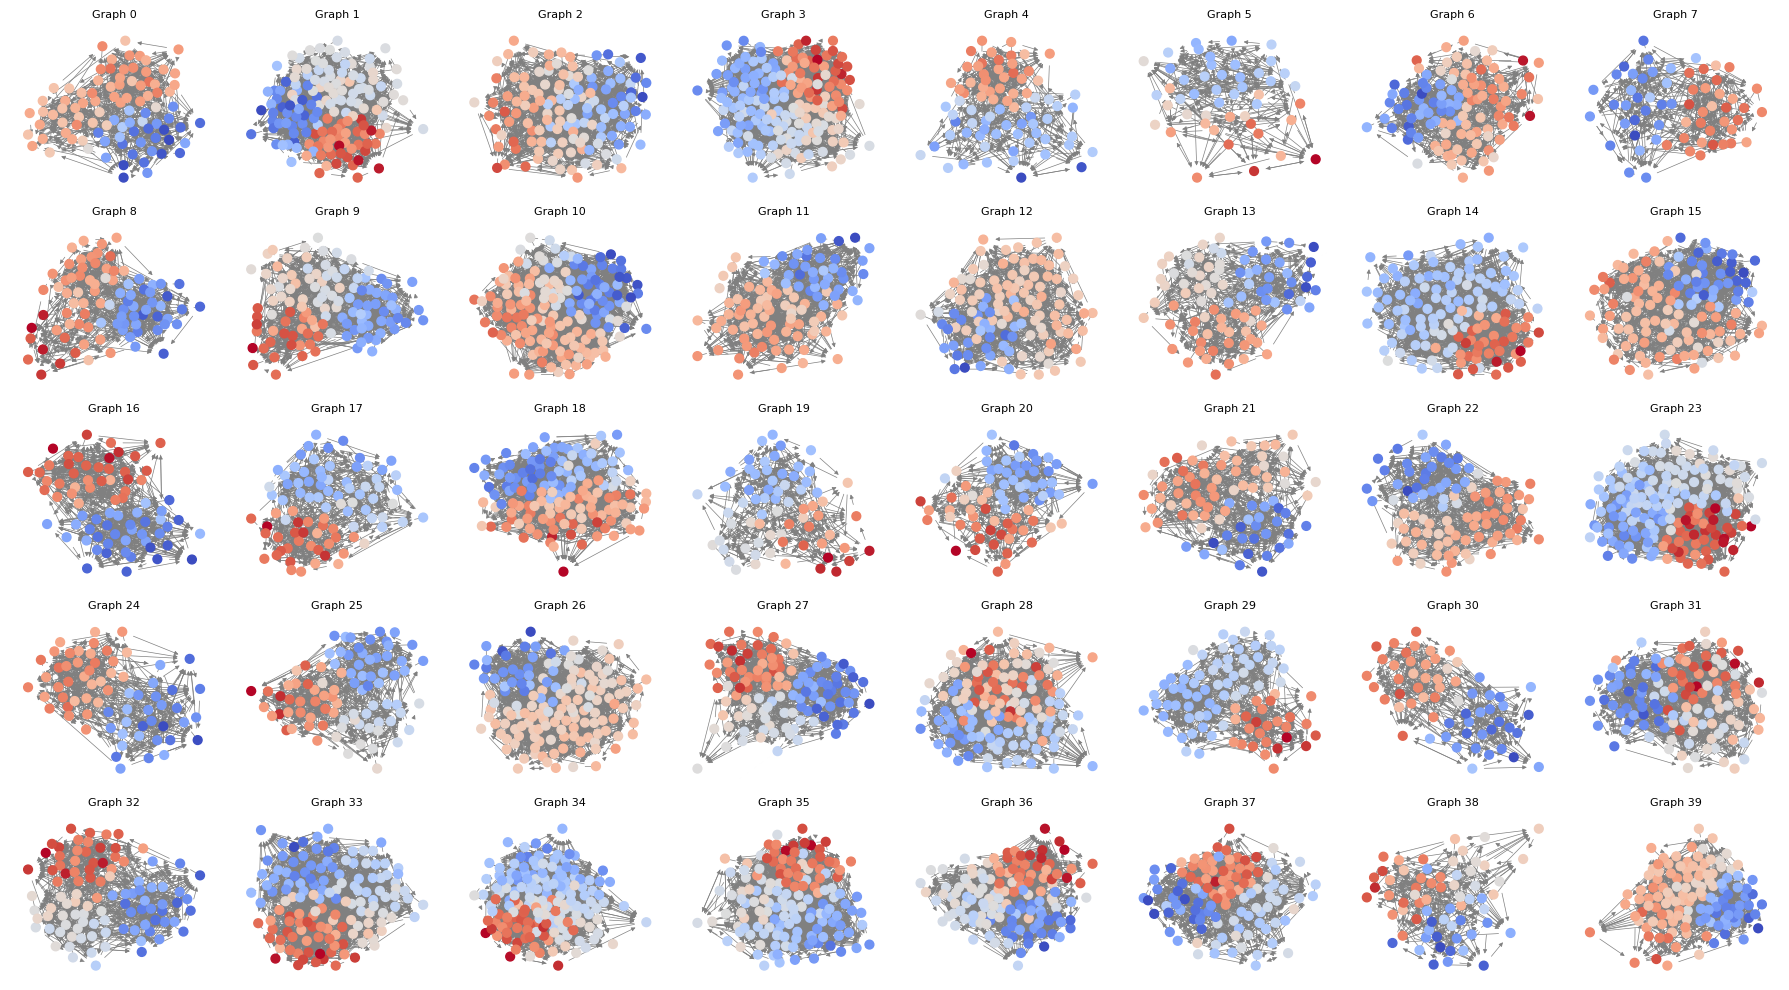

In [21]:
# Plotting all together
# Set up plot grid
n_graphs = 40
n_cols = 8
n_rows = n_graphs // n_cols + int(n_graphs % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i in range(n_graphs):
    array = data[f'arr_{i}']
    G = nx.from_numpy_array(array.astype(int), create_using=nx.DiGraph)

    # Layout and Laplacian
    pos = nx.spring_layout(G, seed=42)  # fixed seed for consistent layout
    L = np.asarray(nx.directed_laplacian_matrix(G, walk_type="pagerank"))
    w, U = np.linalg.eigh(L)

    # Color scaling based on second eigenvector
    vmin, vmax = np.min(U[:, 1]), np.max(U[:, 1])
    m = max(abs(vmin), abs(vmax))
    vmin, vmax = -m, m
    node_colors = U[:, 1]

    # Draw nodes and edges with thinner arrows
    ax = axes[i]
    ax.set_title(f"Graph {i}", fontsize=8)
    ax.axis("off")

    nx.draw_networkx_nodes(
        G,
        pos,
        node_color=node_colors,
        cmap=plt.cm.coolwarm,
        vmin=vmin,
        vmax=vmax,
        node_size=40,
        ax=ax
    )

    nx.draw_networkx_edges(
        G,
        pos,
        arrows=True,
        edge_color="grey",
        width=0.5,
        arrowsize=6,
        ax=ax
    )

# Remove empty subplots if n_graphs < n_rows * n_cols
for j in range(n_graphs, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
pos = nx.kamada_kawai_layout(G)  # Or try nx.spring_layout(G)
# Set node colors based on the eigenvectors
# Compute directed Laplacian matrix (as a NumPy array)
L = np.asarray(nx.directed_laplacian_matrix(G, walk_type="pagerank"))

# Get eigenvalues and eigenvectors
w, U  = np.linalg.eigh(L)
# w, U = np.linalg.eigh(nx.normalized_laplacian_matrix(G).toarray())
vmin, vmax = np.min(U[:, 1]), np.max(U[:, 1])
m = max(np.abs(vmin), vmax)
vmin, vmax = -m, m

plt.figure()
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=U[:, 1],
    cmap=plt.cm.coolwarm,
    node_size=50,
    vmin=vmin,
    vmax=vmax
)

nx.draw_networkx_edges(
    G,
    pos,
    arrows=True,
    edge_color="grey",
    width=0.5,       # Thinner lines
    arrowsize=6      # Smaller arrow heads (default is ~10-12)
)

plt.axis("off")
plt.show()

In [ ]:
dataSBMML = np.load('/mnt/lts4/scratch/home/carballo/DAGDiGress/outputs/2025-05-13/11-54-59-sbm-mult10-maglap-sample/generated_adjs.npz')

In [ ]:
SBMML = dataSBMML['arr_17']
G = nx.from_numpy_array(SBMML.astype(int), create_using=nx.DiGraph)
pos = nx.spring_layout(G)  # Or try nx.spring_layout(G)
# Set node colors based on the eigenvectors
# Compute directed Laplacian matrix (as a NumPy array)
L = np.asarray(nx.directed_laplacian_matrix(G, walk_type="pagerank"))

# Get eigenvalues and eigenvectors
w, U  = np.linalg.eigh(L)
# w, U = np.linalg.eigh(nx.normalized_laplacian_matrix(G).toarray())
vmin, vmax = np.min(U[:, 1]), np.max(U[:, 1])
m = max(np.abs(vmin), vmax)
vmin, vmax = -m, m

plt.figure()
nx.draw(
    G,
    pos,
    font_size=5,
    node_size=150,
    with_labels=False,
    node_color=U[:, 1],
    cmap=plt.cm.coolwarm,
    vmin=vmin,
    vmax=vmax,
    arrows=True,
    edge_color="grey",
)
plt.show()